In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


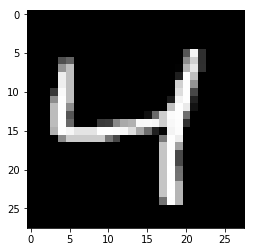

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:

inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')


### 编码器--压缩
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# 当前shape: 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# 当前shape: 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# 当前shape: 4x4x8


### 解码器--还原
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# 当前shape: 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# 当前shape: 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# 当前shape: 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x16


logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#当前shape: 28x28x1


decoded = tf.nn.sigmoid(logits, name='decoded')


#计算损失函数
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
#使用adam优化器优化损失函数
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training




In [5]:
sess = tf.Session()

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6815
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6581
Epoch: 1/20... Training loss: 0.6537
Epoch: 1/20... Training loss: 0.6360
Epoch: 1/20... Training loss: 0.6208
Epoch: 1/20... Training loss: 0.6093
Epoch: 1/20... Training loss: 0.5917
Epoch: 1/20... Training loss: 0.5689
Epoch: 1/20... Training loss: 0.5515
Epoch: 1/20... Training loss: 0.5309
Epoch: 1/20... Training loss: 0.5179
Epoch: 1/20... Training loss: 0.4961
Epoch: 1/20... Training loss: 0.5014
Epoch: 1/20... Training loss: 0.4999
Epoch: 1/20... Training loss: 0.5430
Epoch: 1/20... Training loss: 0.5070
Epoch: 1/20... Training loss: 0.5068
Epoch: 1/20... Training loss: 0.4944
Epoch: 1/20... Training loss: 0.4934
Epoch: 1/20... Training loss: 0.5079
Epoch: 1/20... Training loss: 0.4787
Epoch: 1/20... Training loss: 0.4842
Epoch: 1/20... Training loss: 0.4869
E

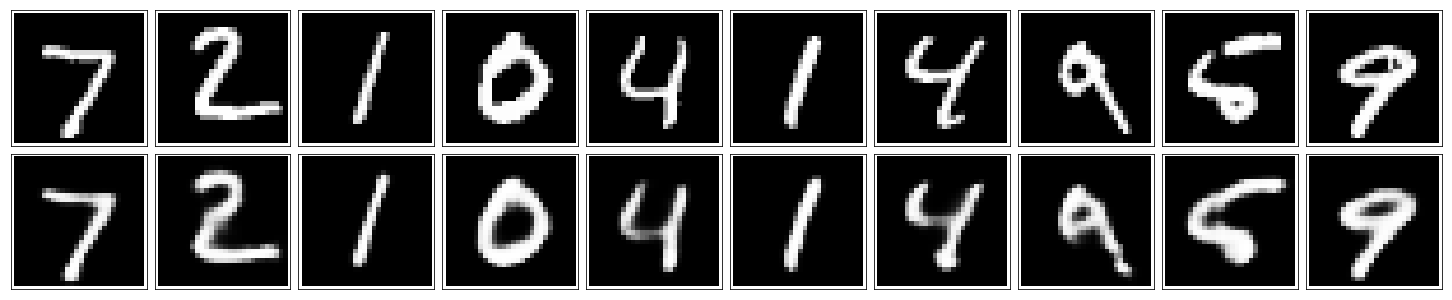

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [8]:
sess.close()

In [9]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')


### 编码器
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# 当前shape: 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# 当前shape: 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# 当前shape: 4x4x16


### 解码器
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# 当前shape: 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# 当前shape: 14x14x16
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# 当前shape: 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x32


logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#当前shape: 28x28x1


decoded = tf.nn.sigmoid(logits, name='decoded')


loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [10]:
sess = tf.Session()

In [ ]:
epochs = 100
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

## Checking out the performance



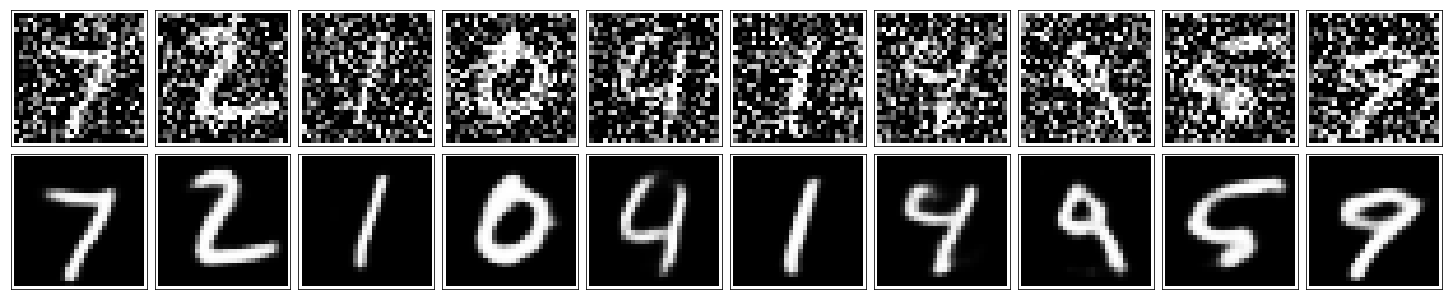

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)